# ZTDL 4: Deep Learning Intro – shallow model

## Opdracht 5.2 vragen uitwerking

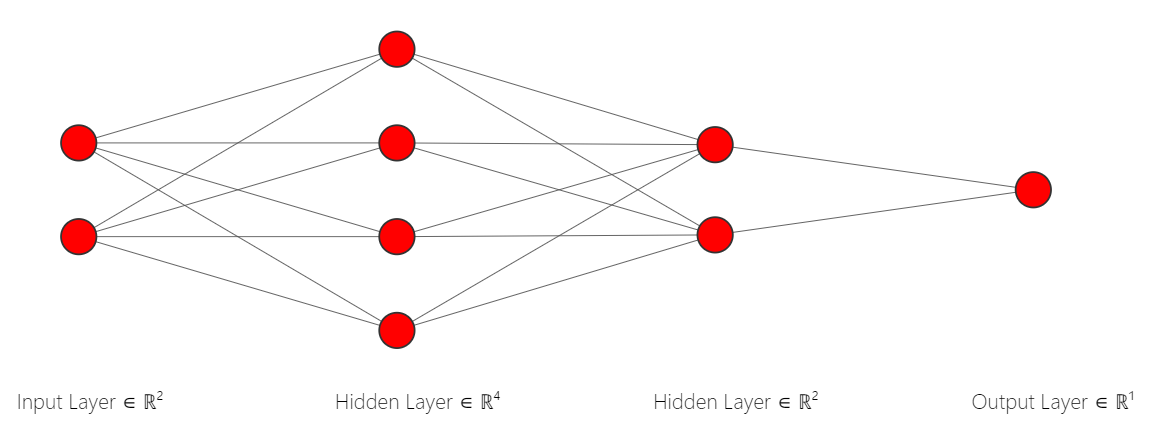

In [7]:
from PIL import Image
img = Image.open('../data/opdracht5_2.png')

# A) Bestudeer in in ZTDL 4 het Deep Model dat wordt toegepast op de dataset, zie ook figuur 11.
    # Zie de hierboven toegevoegde commentaar.

# B) Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training.
    # Laag 1 heeft 12 weegfactoren: 8 van de input neuronen, 4 weegfactoren van de bias.
    # Laag 2 heeft 10 weegfactoren: 8 van de input van laag 1, 2 weegfactoren van de bias.
    # Laag 3 heeft 3 weegfactoren: 2 van de input van laag 2, 1 weegfactor van de bias.
#    Hoeveel lagen heeft dit netwerk?
    # 4: Een input layer, 2 hidden layers en 1 output layer
img

In [8]:
# C) Welke optimizer wordt hier toegepast? Leg in eigen woorden uit wat i.h.a. de functie is van een optimizer.
    # De optimizer Adam (Adaptive Moment Estimation) is een algoritme voor optimalisatietechniek voor gradiëntafdaling.
     # De methode is erg efficiënt bij het werken met grote problemen waarbij veel gegevens op parameters betrokken zijn.
     # Adam is een combinatie van het momentum algoritme en het RMSP algoritme.
    # Tijdens het trainingsproces passen en veranderen we de parameters van ons model om te proberen de 'loss' the minimaliseren
     # end de voorspellingen zo correct en geoptimaliseerd mogelijk te maken. Hier wordt een optimizer voor gebruikt.
     # Want hoe moeten de parameters worden gewijzigd en hoeveel en wanneer? Dit doet de optimizer. Ze verbinden de 'loss'
     # en de parameters door het model bij te werken als reactie op de uitvoer van de loss function. Eenvoudiger gezegd:
     # Optimizers vormenhet model in de meest nauwkeurig mogelijke vorm door met de parameters te spelen.

# D) Wat is je conclusie op basis van accuracy scores van de trainingset en de testset? M.a.w. hoe goed is classificatie?
    # In de hierboven gekregen output staat het volgende:
        # The Accuracy score on the Train set is: 0.999
        # The Accuracy score on the Test set is: 1.000
    # Beide sets hebben een extreem hoge accuracy score en een heel kleine loss. Aangezien de testset een hoger resultaat heeft
     # dan de trainingsset, is de classificatie heel goed.

# E) Is hier sprake van overfitting? Licht je antwoord toe.
    # Er is hier geen sprake van overfitting, want dan zou de testset veel lager moeten uitkomen dan de trainingsset.

In [3]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

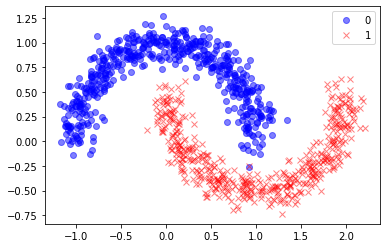

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
#Generating some moons with the make_moons function.
# n_samples is the number of moons we gen
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
# Draw the x moons
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
# Draw the y moons
plt.legend(['0', '1'])
# Adding a legenda

In [3]:
# Return the shape of an array. 1000 entries, 2 columns
X.shape

(1000, 2)

In [4]:
# Prints variable x
X

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ...,
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Een goede strategy is een data set splitsen, een deel voor training en een deel 
# voor het creeeren van je model
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

### Deep model

In [8]:
# The Sequential mode, which is very straightforward (a simple list of layers),
# but is limited to single-input, single-output stacks of layers (as the name gives away).
model = Sequential()
# Add a Dense-layer to the model. It needs 4 neutrons and the input shape is equal to 2.
# The tahn activation function is one such function, which is very popular in Machine Learning literature, since it is a continuous and differential funciton.
# It is used to 'turn on' specific layers depending on the input. 
# Tahn is a very good choice for backprogation.
model.add(Dense(4, input_shape=(2,), activation='tanh'))
# Add a Dense-layer to the model. It needs 2 neutrons.
# Again the tahn activation function is used.
model.add(Dense(2, activation='tanh'))
# Add a Dense-layer to the model. It needs 1 neutron.
# Now the sigmoid activation function is used, also called the logistic function. It is traditionally a very popular activation
# function for neural networks. The input to the function is transformed into a value between 0.0 and 1.0.
# Inputs that are larger than 1.0 are transformed to the value 1.0. Similarly, values smaller than 0.0 are transformed to 0.0.
model.add(Dense(1, activation='sigmoid'))
# We are using an optimizer. An optimizer is iniming the loss of the function (minimize error).
# Adam is considered to be one of the best optimizers. 
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
# summerise the model: get amount of layers, type of layers and amount of params.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train the model with the funcion model.fit().
# An epoch means how many times the program runs through the data.
# After the furst epoch, we rerun through our data and keep optimizing it.
# Larger datasets means less epochs.
model.fit(X_train, y_train, epochs=100, verbose=0)

In [12]:
# Calculate the loss and accuracy of the model in test mode.
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 567us/step - loss: 0.0018 - accuracy: 1.0000


[0.0018352022161707282, 1.0]

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

# Print the results of the accuracy of the train set and the test set.
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


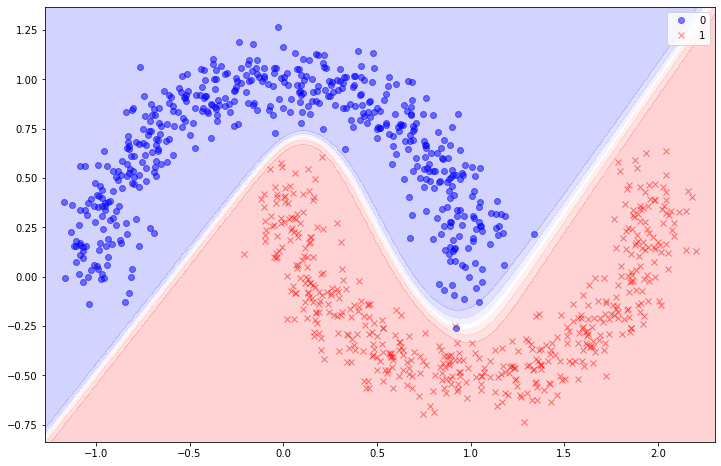

In [15]:
def plot_decision_boundary(model, X, y):
    # Generates the contour plot below.
    # Set min and max values and give them some padding.
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    # Generate a grid of points with distance h between them.
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # Predict the funcion value for the whole grid.
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    # Plot the contour and training examples.
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)